In [1]:
pip install transformers torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 18.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 19.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 24.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 49.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [2]:
#libraries
import spacy
import requests
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from transformers import pipeline
from collections import defaultdict

**Load a Dickens Text**

In [3]:
# david copperfield
url = "https://www.gutenberg.org/cache/epub/766/pg766.txt"
text = requests.get(url).text

**Preprocess & Load into spaCy**

In [4]:
nlp = spacy.load("en_core_web_sm")
nlp.max_length = 90000000

doc = nlp(text[3000:])

**Extract Sentences with Mental State Verbs**

In [5]:
theory_of_mind_verbs = [
    "think", "believe", "know", "wonder", "suppose", "realize",
    "realise","imagine", "guess", "doubt", "feel", "consider",
    "hope","wish", "suspect", "predict", "expect", "assume", "fear"
]

matching_sentences = []

for sent in doc.sents:
    if any(token.lemma_ in theory_of_mind_verbs for token in sent):
        matching_sentences.append(sent.text)

**Count Mental State Verb Frequency**

In [6]:
verb_counts = Counter()

for sent in doc.sents:
    for token in sent:
        if token.lemma_ in theory_of_mind_verbs:
            verb_counts[token.lemma_] += 1

print(verb_counts.most_common())

[('know', 1280), ('think', 1085), ('feel', 403), ('believe', 285), ('hope', 255), ('suppose', 216), ('wish', 190), ('doubt', 151), ('wonder', 142), ('consider', 136), ('expect', 115), ('fear', 60), ('imagine', 25), ('suspect', 22), ('assume', 19), ('guess', 9), ('realize', 2), ('predict', 2)]


**Visualise Frequency Over Time (Chunk-Based)**

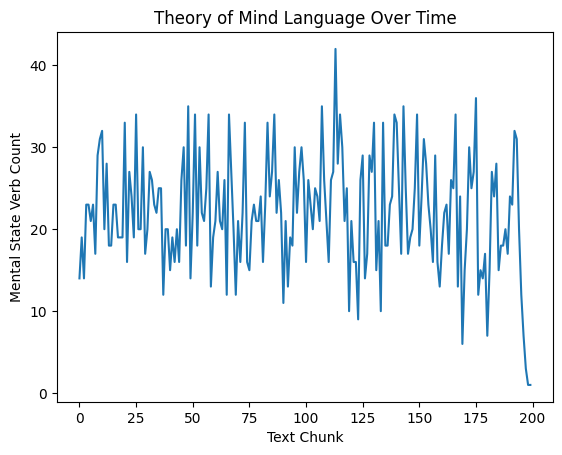

In [7]:
chunk_size = 10000  # adjustments can be made
chunks = [text[i:i+chunk_size] for i in range(0, len(text), chunk_size)]
counts_over_time = []

for chunk in chunks:
    doc = nlp(chunk)
    count = sum(1 for token in doc if token.lemma_ in theory_of_mind_verbs)
    counts_over_time.append(count)

plt.plot(counts_over_time)
plt.xlabel("Text Chunk")
plt.ylabel("Mental State Verb Count")
plt.title("Theory of Mind Language Over Time")
plt.show()

**Track Character Co-occurrence**
To find which characters are associated with mental states.

In [8]:
characters = ["David", "David Copperfield","Dora", "Agnes", "Uriah", "Steerforth", "Peggotty", "Mr. Murdstone"]
character_mentalization = {name: 0 for name in characters}

for sent in matching_sentences:
    for name in characters:
        if name in sent:
            character_mentalization[name] += 1

print(character_mentalization)

{'David': 15, 'David Copperfield': 4, 'Dora': 110, 'Agnes': 123, 'Uriah': 52, 'Steerforth': 107, 'Peggotty': 158, 'Mr. Murdstone': 21}




---



**BERT-Based Emotion Detection**

**Load Pretrained Emotion Model**

In [9]:
# load emotion classifier pipeline
emotion_pipeline = pipeline("text-classification",
                            model="j-hartmann/emotion-english-distilroberta-base",
                            return_all_scores=True)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.00k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/329M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/294 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/329M [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

Device set to use cpu
/usr/local/lib/python3.11/dist-packages/transformers/pipelines/text_classification.py:106: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


**Run Emotion Detection on the Whole Book**

In [10]:
def chunk_text(text, size=1000):
    words = text.split()
    return [' '.join(words[i:i+size]) for i in range(0, len(words), size)]

chunks = chunk_text(text[3000:], size=1000)

emotion_scores = []

for chunk in chunks:
    try:
        scores = emotion_pipeline(chunk[:512])[0]  # limit to BERT's max token count
        scores_dict = {s["label"]: s["score"] for s in scores}
        emotion_scores.append(scores_dict)
    except:
        continue

**Convert to DataFrame & Plot Emotion Arcs**

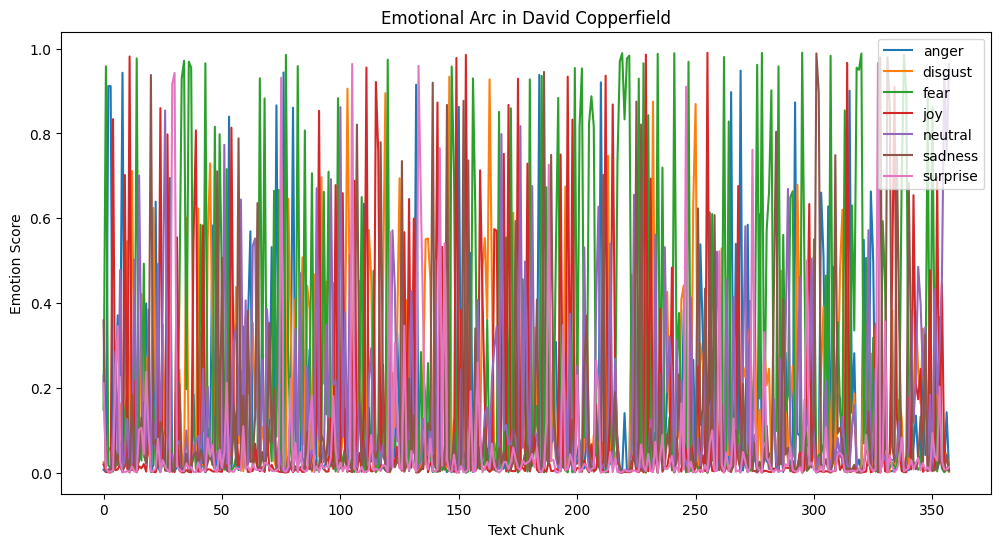

In [11]:
df = pd.DataFrame(emotion_scores)
df.fillna(0, inplace=True)

plt.figure(figsize=(12, 6))
for emotion in df.columns:
    plt.plot(df[emotion], label=emotion)

plt.legend()
plt.title("Emotional Arc in David Copperfield")
plt.xlabel("Text Chunk")
plt.ylabel("Emotion Score")
plt.show()

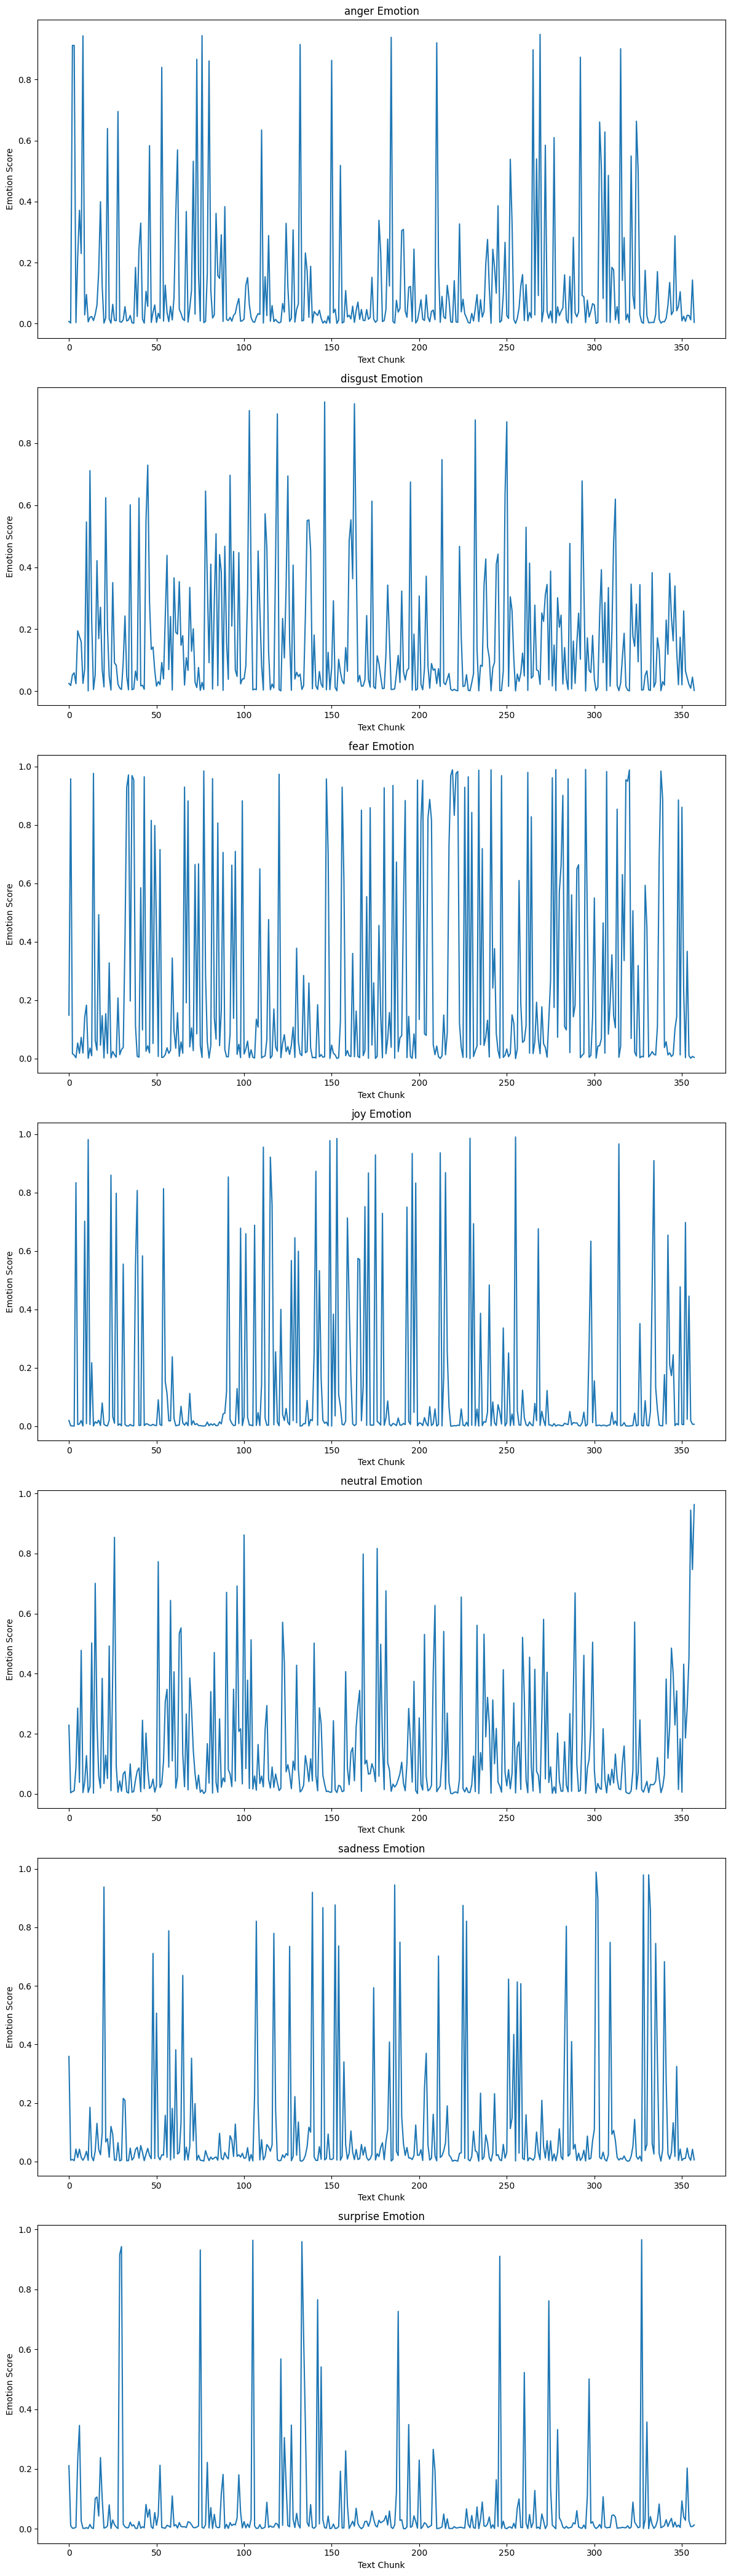

In [12]:
df = pd.DataFrame(emotion_scores)
df.fillna(0, inplace=True)

# Determine the number of emotions
num_emotions = len(df.columns)

# Set up subplots: one for each emotion
fig, axes = plt.subplots(num_emotions, 1, figsize=(12, 6 * num_emotions))

# If there's only one emotion, axes is not an array, so we handle it separately
if num_emotions == 1:
    axes = [axes]

for i, emotion in enumerate(df.columns):
    axes[i].plot(df[emotion])
    axes[i].set_title(f"{emotion} Emotion")
    axes[i].set_xlabel("Text Chunk")
    axes[i].set_ylabel("Emotion Score")

plt.tight_layout()
plt.show()



---

**Comparing the emotional arc of the narrator versus other characters**

In [13]:
def chunk_text(text, size=1000):
    words = text.split()
    return [' '.join(words[i:i+size]) for i in range(0, len(words), size)]

chunks = chunk_text(text[3000:], size=1000)  # remove Gutenberg header

**Define Filters**

In [14]:
narrator_keywords = ["I", "me", "my", "myself"]
character_names = ["Dora", "Agnes", "Uriah", "Steerforth", "Peggotty", "Mr. Murdstone"]

**Extract Narrator vs Character Sentences**

In [15]:
nlp = spacy.load("en_core_web_sm")

def extract_sentences(chunk, keywords):
    doc = nlp(chunk)
    return [sent.text for sent in doc.sents if any(kw in sent.text for kw in keywords)]

**Run Emotion Detection on Each Set**

In [16]:
narrator_emotions = []
character_emotions = []

for chunk in chunks:
    narrator_text = " ".join(extract_sentences(chunk, narrator_keywords))[:512]
    character_text = " ".join(extract_sentences(chunk, character_names))[:512]

    try:
        narr_em = emotion_pipeline(narrator_text)[0]
        char_em = emotion_pipeline(character_text)[0]

        narr_scores = {e["label"]: e["score"] for e in narr_em}
        char_scores = {e["label"]: e["score"] for e in char_em}

        narrator_emotions.append(narr_scores)
        character_emotions.append(char_scores)
    except:
        continue

**Convert to DataFrames and Plot**

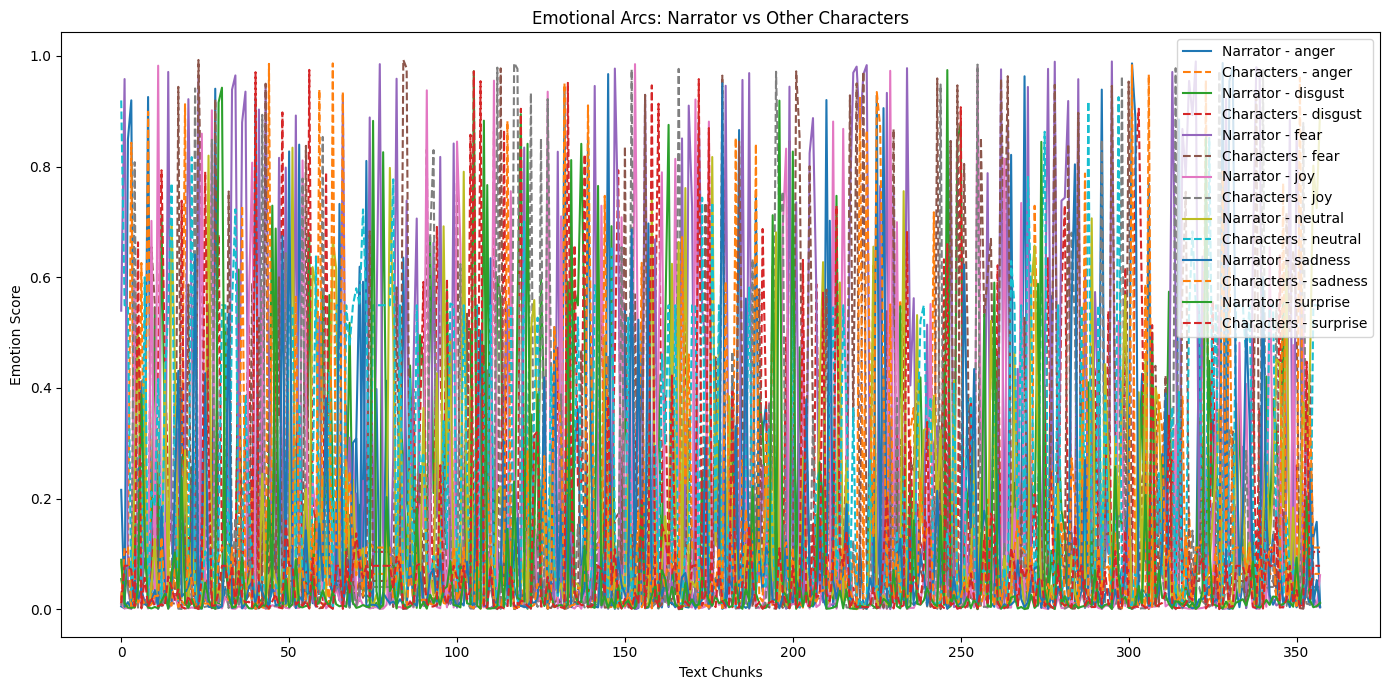

In [17]:
narr_df = pd.DataFrame(narrator_emotions).fillna(0)
char_df = pd.DataFrame(character_emotions).fillna(0)

plt.figure(figsize=(14, 7))
for emotion in narr_df.columns:
    plt.plot(narr_df[emotion], label=f"Narrator - {emotion}", linestyle='solid')
    plt.plot(char_df[emotion], label=f"Characters - {emotion}", linestyle='dashed')

plt.title("Emotional Arcs: Narrator vs Other Characters")
plt.xlabel("Text Chunks")
plt.ylabel("Emotion Score")
plt.legend()
plt.tight_layout()
plt.show()

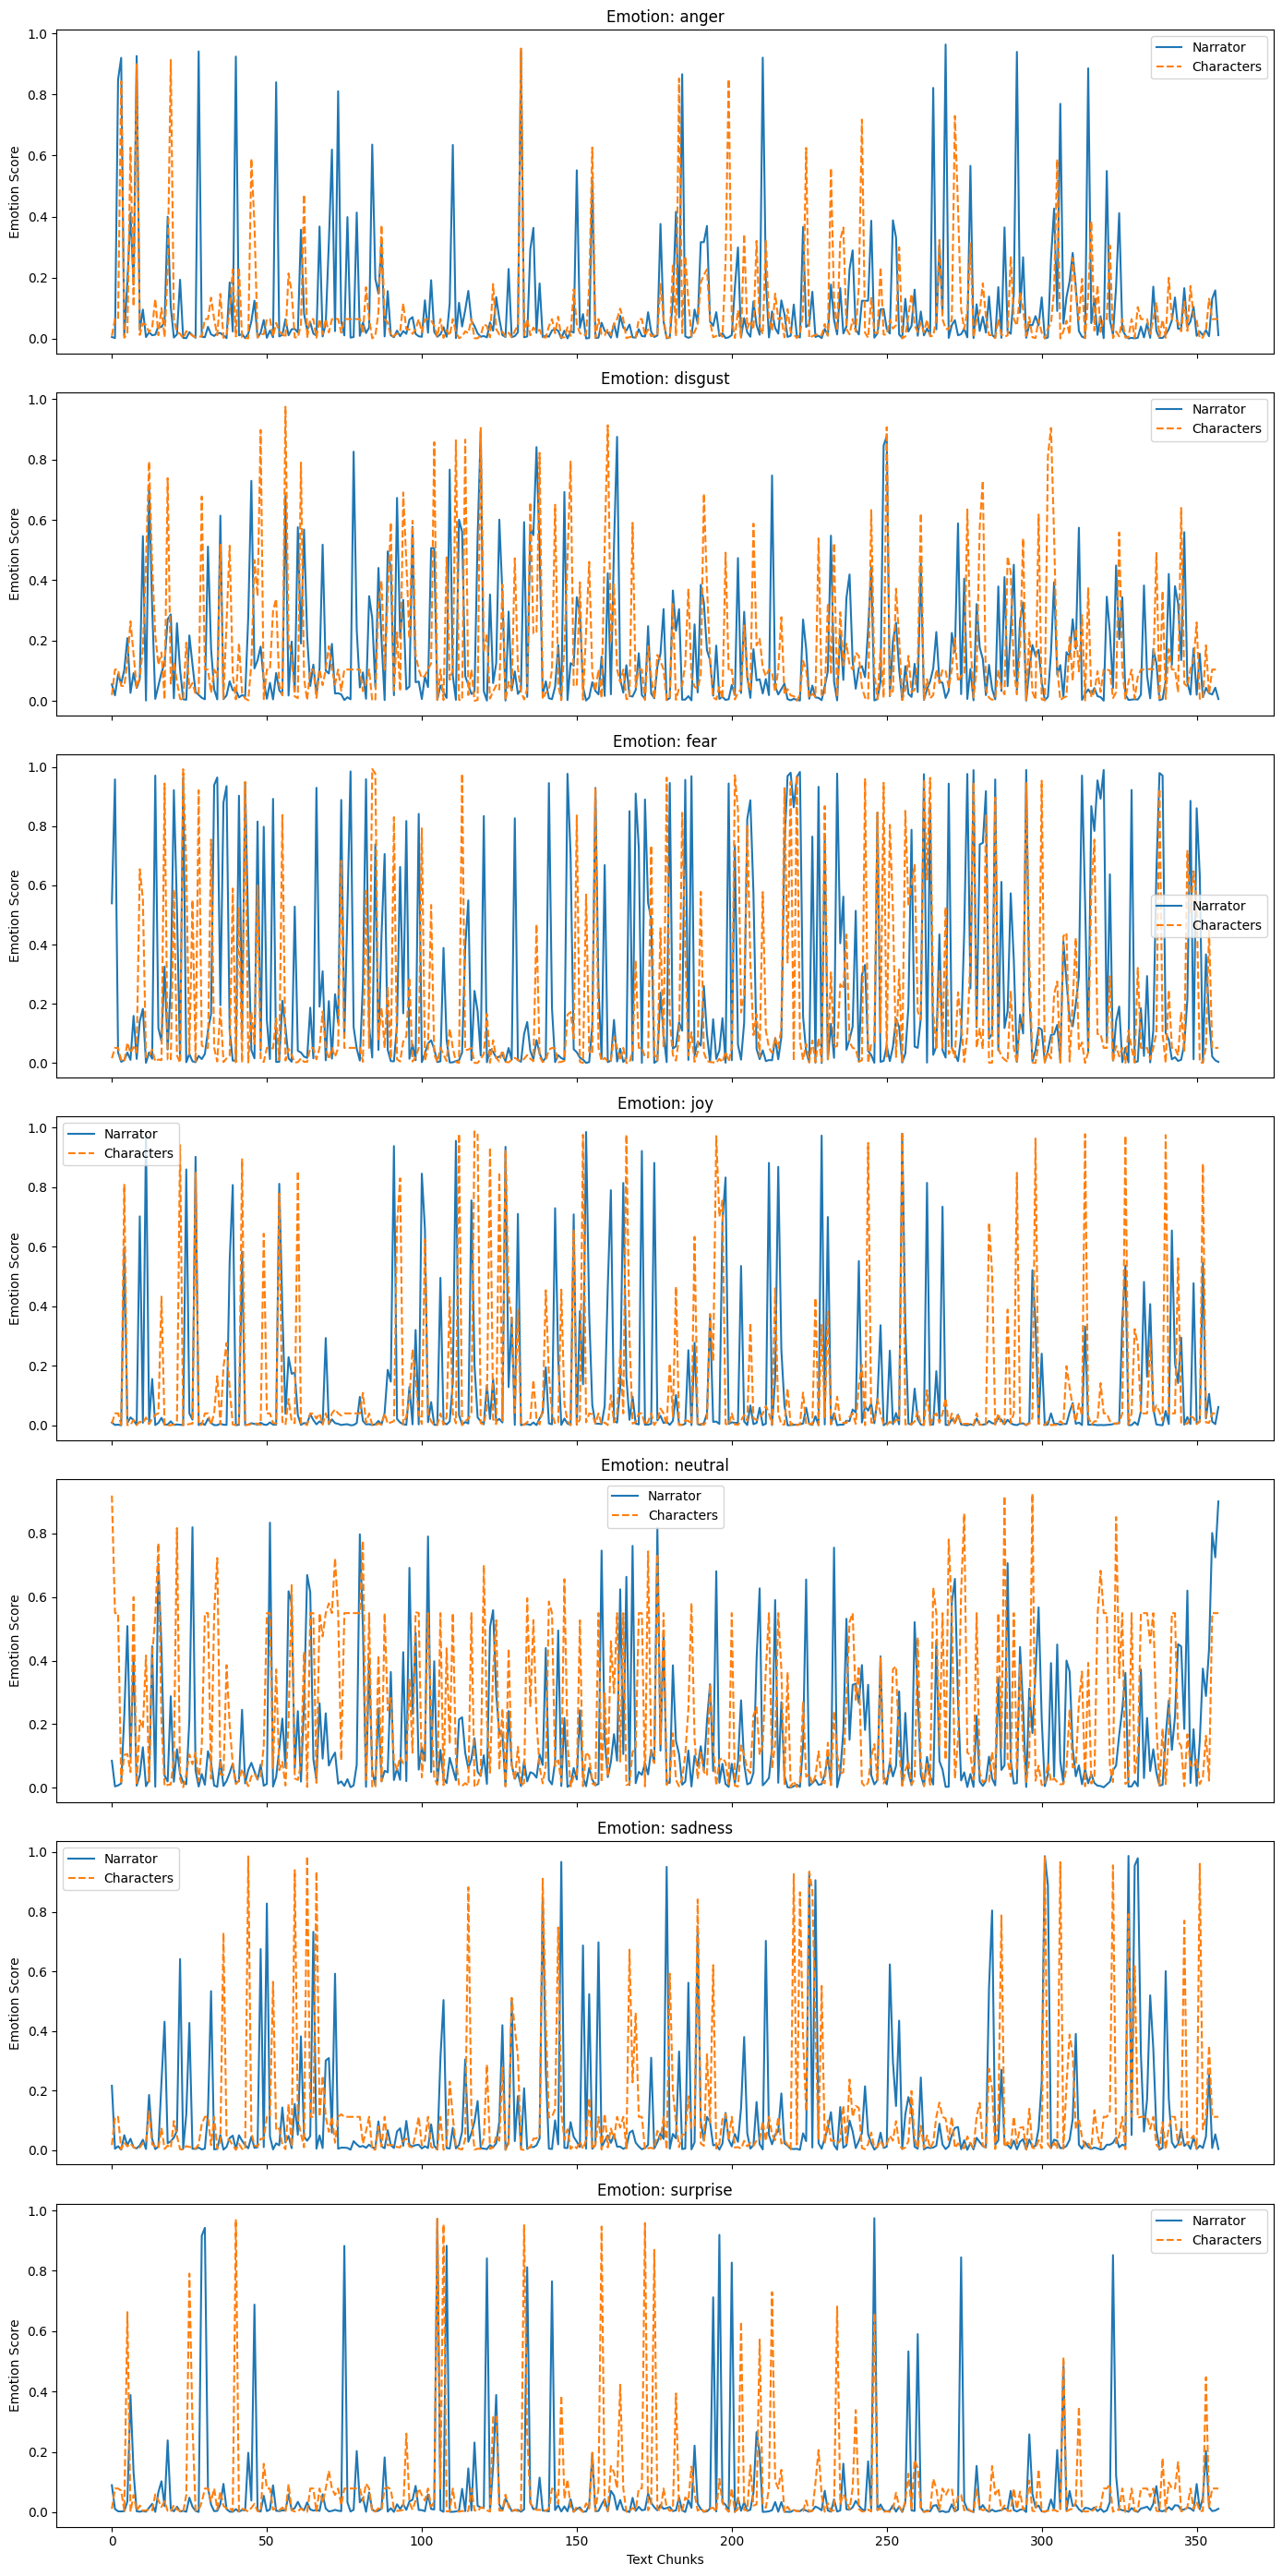

In [18]:
narr_df = pd.DataFrame(narrator_emotions).fillna(0)
char_df = pd.DataFrame(character_emotions).fillna(0)

num_emotions = len(narr_df.columns)
fig, axes = plt.subplots(num_emotions, 1, figsize=(14, 4 * num_emotions), sharex=True)

if num_emotions == 1:
    axes = [axes]

for i, emotion in enumerate(narr_df.columns):
    axes[i].plot(narr_df[emotion], label="Narrator", linestyle='solid')
    axes[i].plot(char_df[emotion], label="Characters", linestyle='dashed')
    axes[i].set_title(f"Emotion: {emotion}")
    axes[i].set_ylabel("Emotion Score")
    axes[i].legend()

axes[-1].set_xlabel("Text Chunks")
plt.tight_layout()
plt.show()

In [19]:
# emotion groups
emotion_categories = {
    "joy": "Basic Emotion",
    "anger": "Basic Emotion",
    "sadness": "Basic Emotion",
    "fear": "Basic Emotion",
    "disgust": "Social Emotion",
    "surprise": "Social Emotion"
}

In [20]:
def plot_emotion_arcs_individually(narr_df, char_df, categories):
    for emotion, category in categories.items():
        if emotion in narr_df.columns and emotion in char_df.columns:
            plt.figure(figsize=(10, 4))
            plt.plot(narr_df[emotion], label='Narrator', linestyle='solid')
            plt.plot(char_df[emotion], label='Characters', linestyle='dashed')
            plt.title(f"{emotion.capitalize()} ({category})")
            plt.xlabel("Text Chunk")
            plt.ylabel("Emotion Score")
            plt.legend()
            plt.tight_layout()
            plt.show()

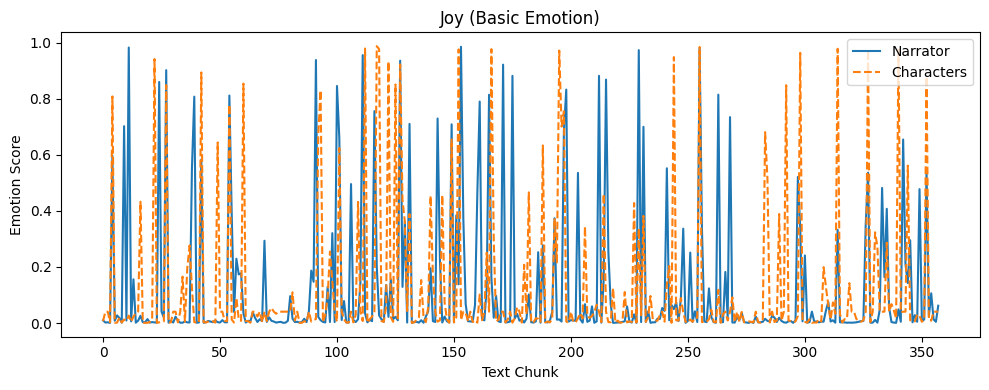

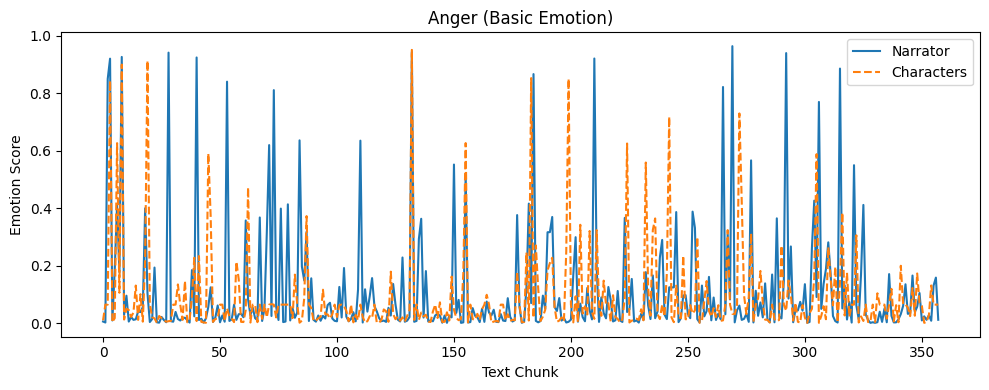

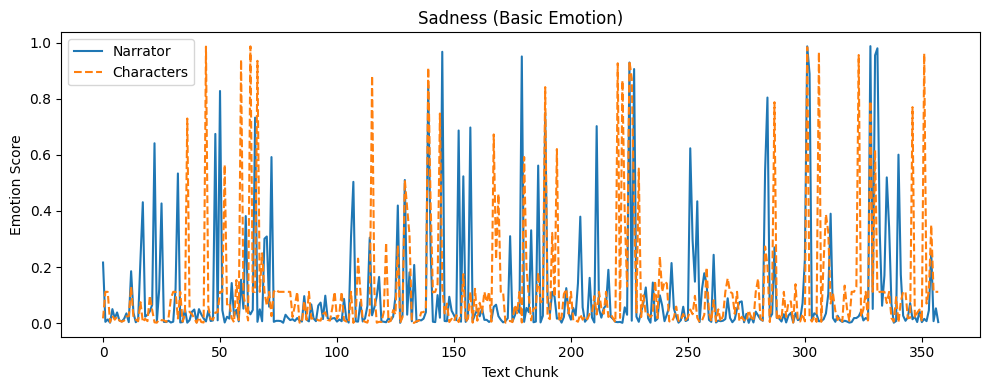

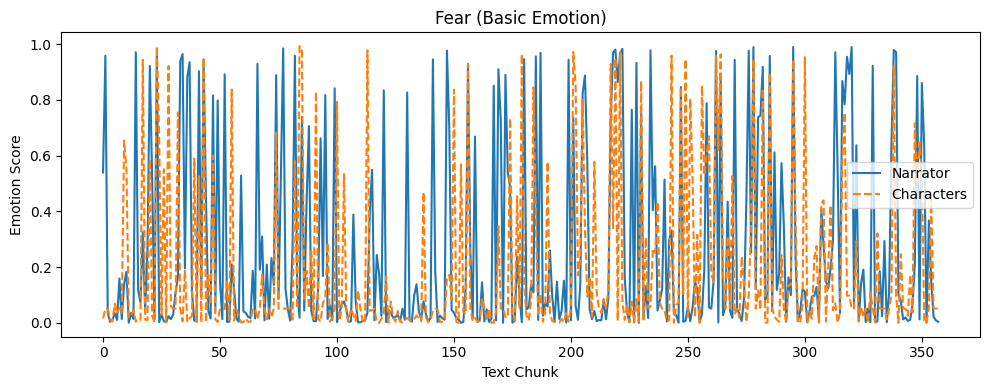

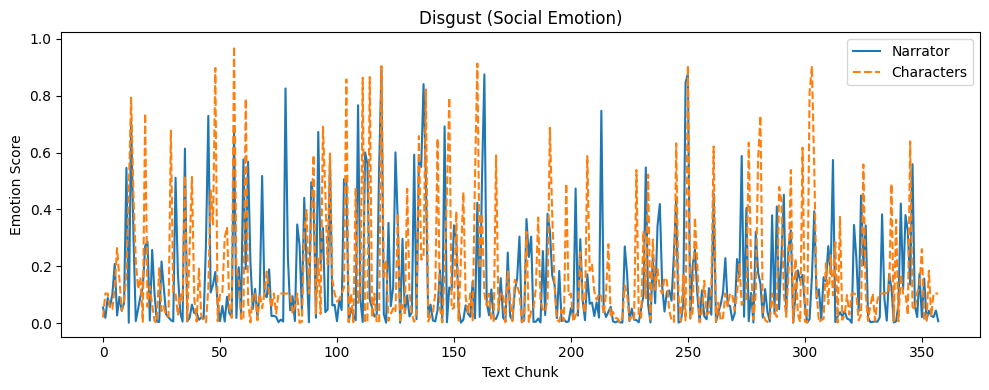

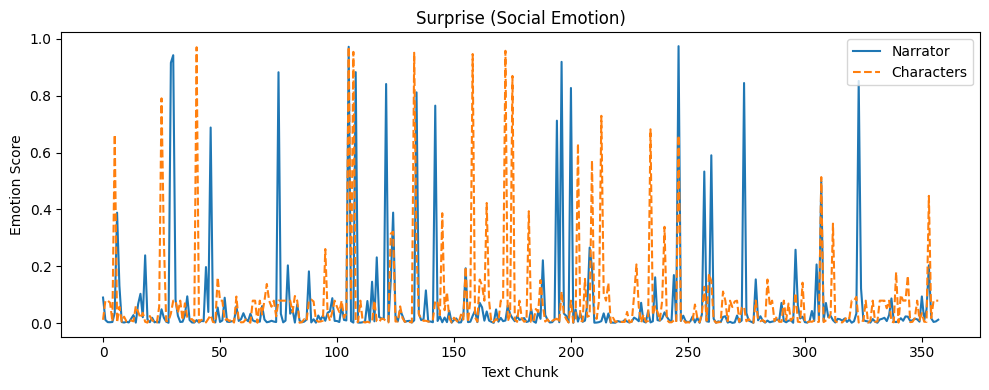

In [21]:
plot_emotion_arcs_individually(narr_df, char_df, emotion_categories)

In [22]:
from matplotlib.patches import Arc
from scipy.signal import find_peaks

def plot_emotion_arcs_individually(narr_df, char_df, categories):
    for emotion, category in categories.items():
        if emotion in narr_df.columns and emotion in char_df.columns:
            plt.figure(figsize=(10, 4))
            narrator_scores = narr_df[emotion]
            character_scores = char_df[emotion]

            # Plot lines
            plt.plot(narrator_scores, label='Narrator', linestyle='solid')
            plt.plot(character_scores, label='Characters', linestyle='dashed')

            # Find peaks in narrator emotion
            peaks, _ = find_peaks(narrator_scores, height=0.6)  # adjust threshold if needed
            peaksC, _ = find_peaks(character_scores, height=0.6)

            # Add arcs above peaks
            for peak in peaks:
                arc = Arc((peak, narrator_scores.iloc[peak] + 0.05),
                          width=8, height=0.1,
                          theta1=0, theta2=180,
                          color='red', lw=1.5)
                plt.gca().add_patch(arc)

            # Add arcs above peaks
            for peak in peaksC:
                arc = Arc((peak, character_scores.iloc[peak] + 0.05),
                          width=8, height=0.1,
                          theta1=0, theta2=180,
                          color='green', lw=1.5)
                plt.gca().add_patch(arc)

            plt.title(f"{emotion.capitalize()} ({category})")
            plt.xlabel("Text Chunk")
            plt.ylabel("Emotion Score")
            plt.legend()
            plt.tight_layout()
            plt.show()


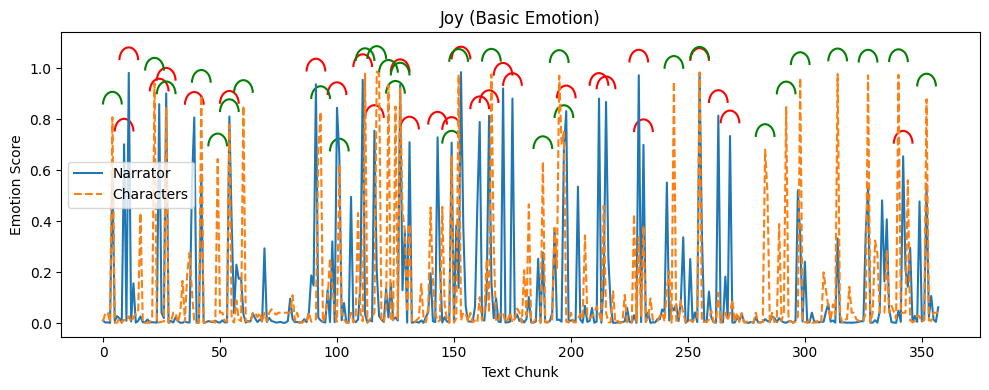

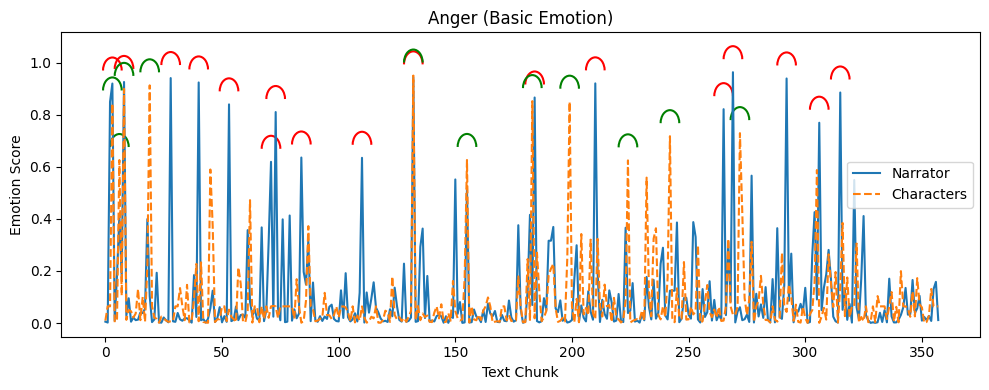

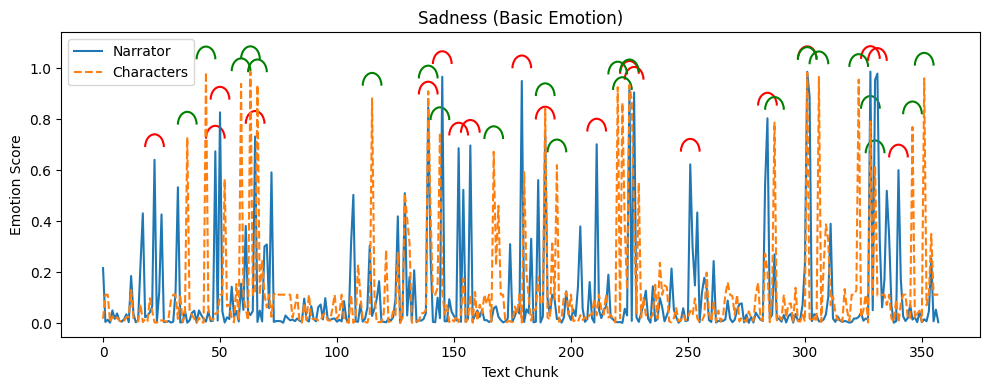

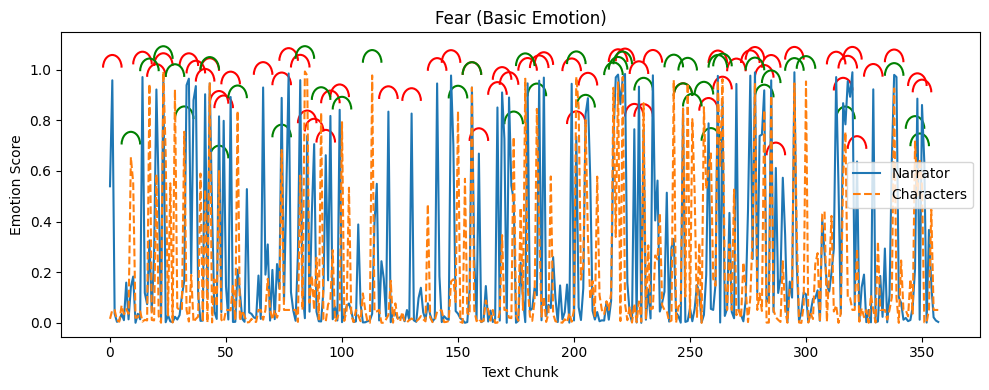

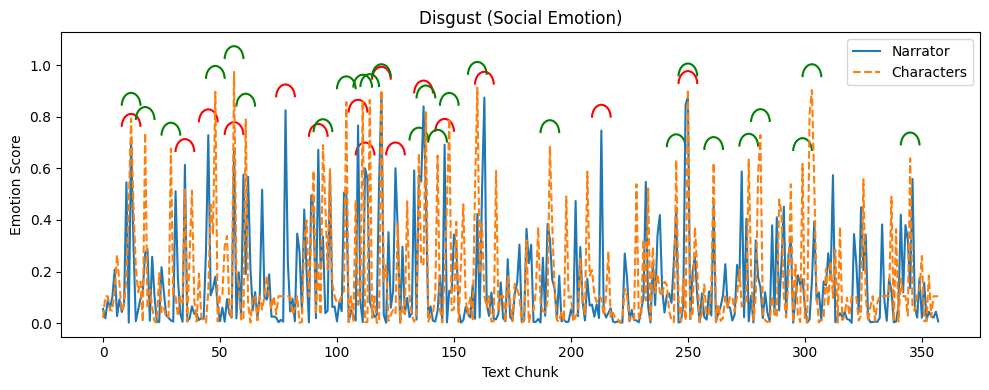

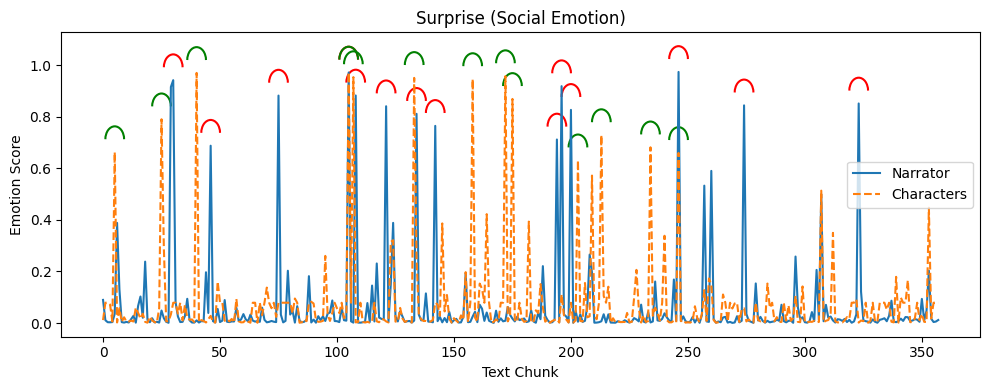

In [23]:
plot_emotion_arcs_individually(narr_df, char_df, emotion_categories)

In [24]:
from scipy.signal import savgol_filter

def plot_smoothed_emotions(narr_df, char_df, categories):
    for emotion, category in categories.items():
        if emotion in narr_df.columns and emotion in char_df.columns:
            plt.figure(figsize=(10, 4))

            narrator_scores = narr_df[emotion]
            character_scores = char_df[emotion]

            # Apply smoothing (window size must be odd, polyorder ≤ window size)
            narrator_smooth = savgol_filter(narrator_scores, window_length=11, polyorder=3)
            character_smooth = savgol_filter(character_scores, window_length=11, polyorder=3)

            # Plot smooth curves
            plt.plot(narrator_smooth, label='Narrator (smoothed)', linestyle='solid')
            plt.plot(character_smooth, label='Characters (smoothed)', linestyle='dashed')

            plt.title(f"{emotion.capitalize()} ({category})")
            plt.xlabel("Text Chunk")
            plt.ylabel("Emotion Score")
            plt.legend()
            plt.tight_layout()
            plt.show()


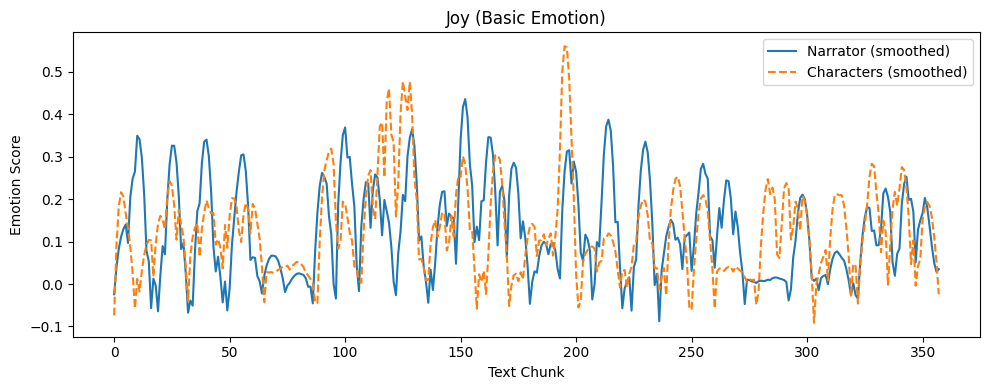

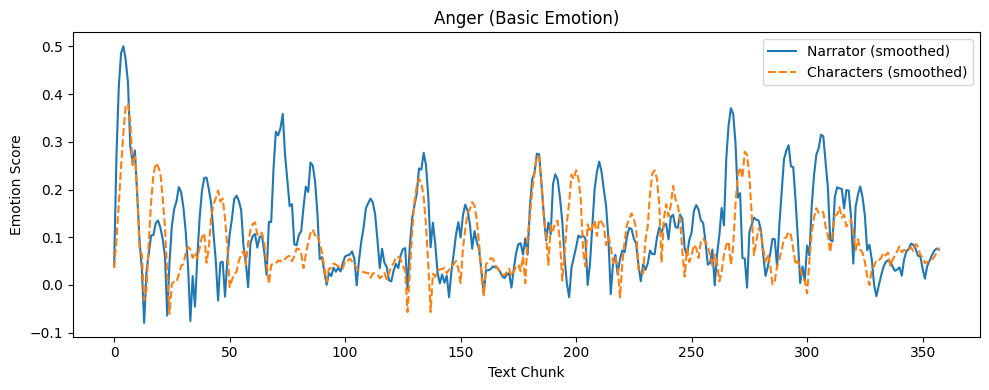

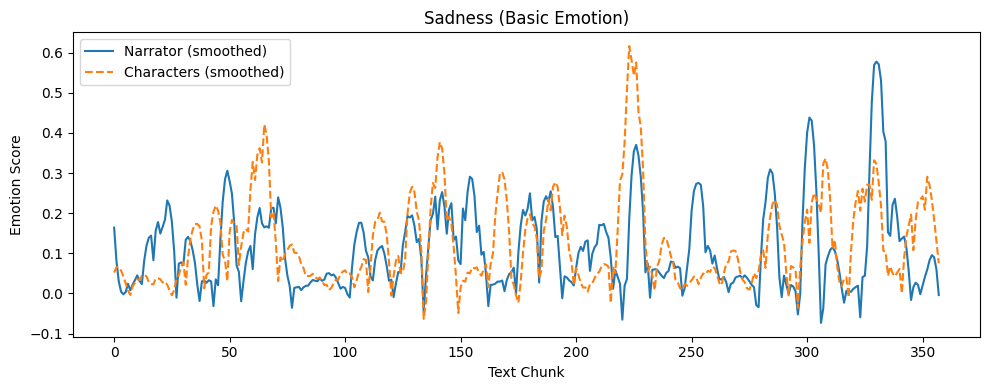

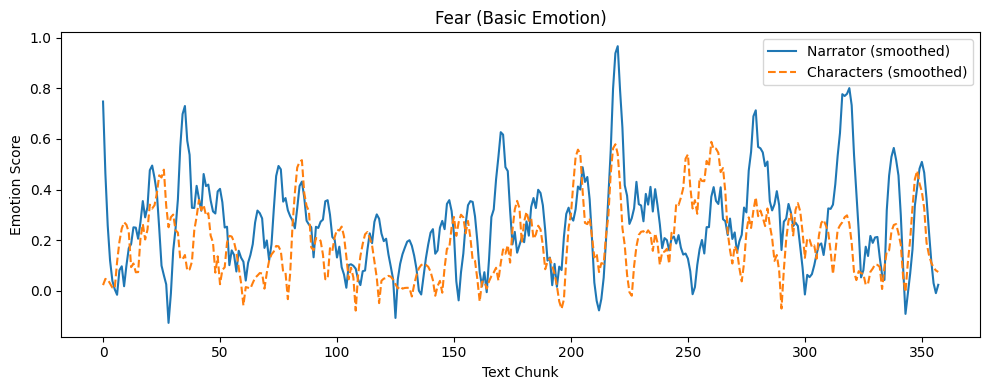

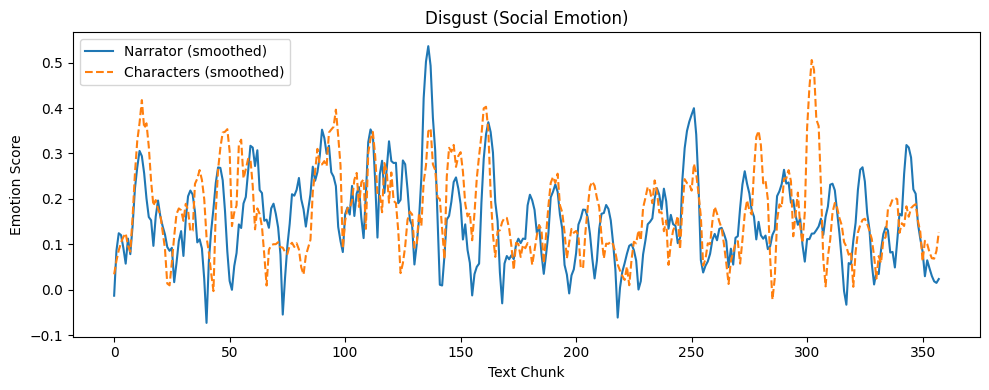

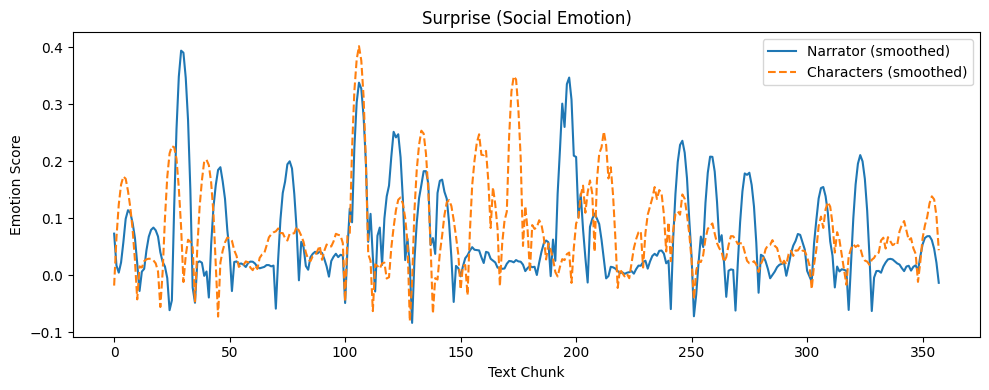

In [25]:
plot_smoothed_emotions(narr_df, char_df, emotion_categories)